In [188]:
import pandas as pd
import warnings
import numpy as np
from numpy import shape, ones, mat
from numpy.ma import exp
import matplotlib.pyplot as plt
import seaborn as sns
import math
import missingno as msno
import copy
import statsmodels.formula.api
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split, ParameterGrid, GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# 1. Read File

In [2]:
df = pd.read_csv('union_all_diabetes_final.csv')

In [3]:
df.sample(5)

,SEQN,have_diabetes,age_get_diabetes,have_prediabetes,have_risk,feel_risk,family_history,overweight,poor_diet,baby_weighed_over9,lack_physical_activity,high_blood_pressure,high_blood_sugar,high_cholesterol,hypoglycemic
5740,99680.0,2.0,NaN,0,0,2.0,0,0,0,0,0,0,0,0,0
31586,77046.0,2.0,NaN,0,0,1.0,1,0,0,0,0,0,0,0,0
5202,99126.0,2.0,NaN,0,0,2.0,0,0,0,0,0,0,0,0,0
14523,89607.0,2.0,NaN,0,0,2.0,0,0,0,0,0,0,0,0,0
12042,87017.0,2.0,NaN,2,0,NaN,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38012 entries, 0 to 38011
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SEQN                    38012 non-null  float64
 1   have_diabetes           38010 non-null  float64
 2   age_get_diabetes        3219 non-null   float64
 3   have_prediabetes        38012 non-null  int64  
 4   have_risk               38012 non-null  int64  
 5   feel_risk               25000 non-null  float64
 6   family_history          38012 non-null  int64  
 7   overweight              38012 non-null  int64  
 8   poor_diet               38012 non-null  int64  
 9   baby_weighed_over9      38012 non-null  int64  
 10  lack_physical_activity  38012 non-null  int64  
 11  high_blood_pressure     38012 non-null  int64  
 12  high_blood_sugar        38012 non-null  int64  
 13  high_cholesterol        38012 non-null  int64  
 14  hypoglycemic            38012 non-null

* check null values:

In [5]:
df.isna().sum()

SEQN                          0
have_diabetes                 2
age_get_diabetes          34793
have_prediabetes              0
have_risk                     0
feel_risk                 13012
family_history                0
overweight                    0
poor_diet                     0
baby_weighed_over9            0
lack_physical_activity        0
high_blood_pressure           0
high_blood_sugar              0
high_cholesterol              0
hypoglycemic                  0
dtype: int64

# 2. EDA

* target feature: `'have_risk'` {0, 1}

    our dataset has much more rows for 0 than 1

In [6]:
print(df['have_risk'].value_counts())

0    34419
1     3593
Name: have_risk, dtype: int64


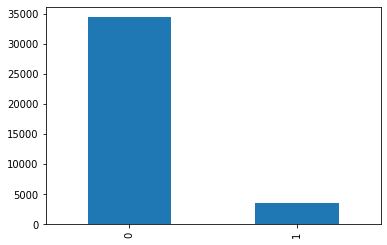

In [7]:
p=df.have_risk.value_counts().plot(kind="bar")
plt.show()

features:

In [8]:
feature_lst = ['have_prediabetes', 'family_history', 'overweight', 'poor_diet', 'baby_weighed_over9', 'lack_physical_activity', 'high_blood_pressure', 'high_blood_sugar', 'high_cholesterol', 'hypoglycemic']

In [63]:
diabetes_data_copy = df.copy()

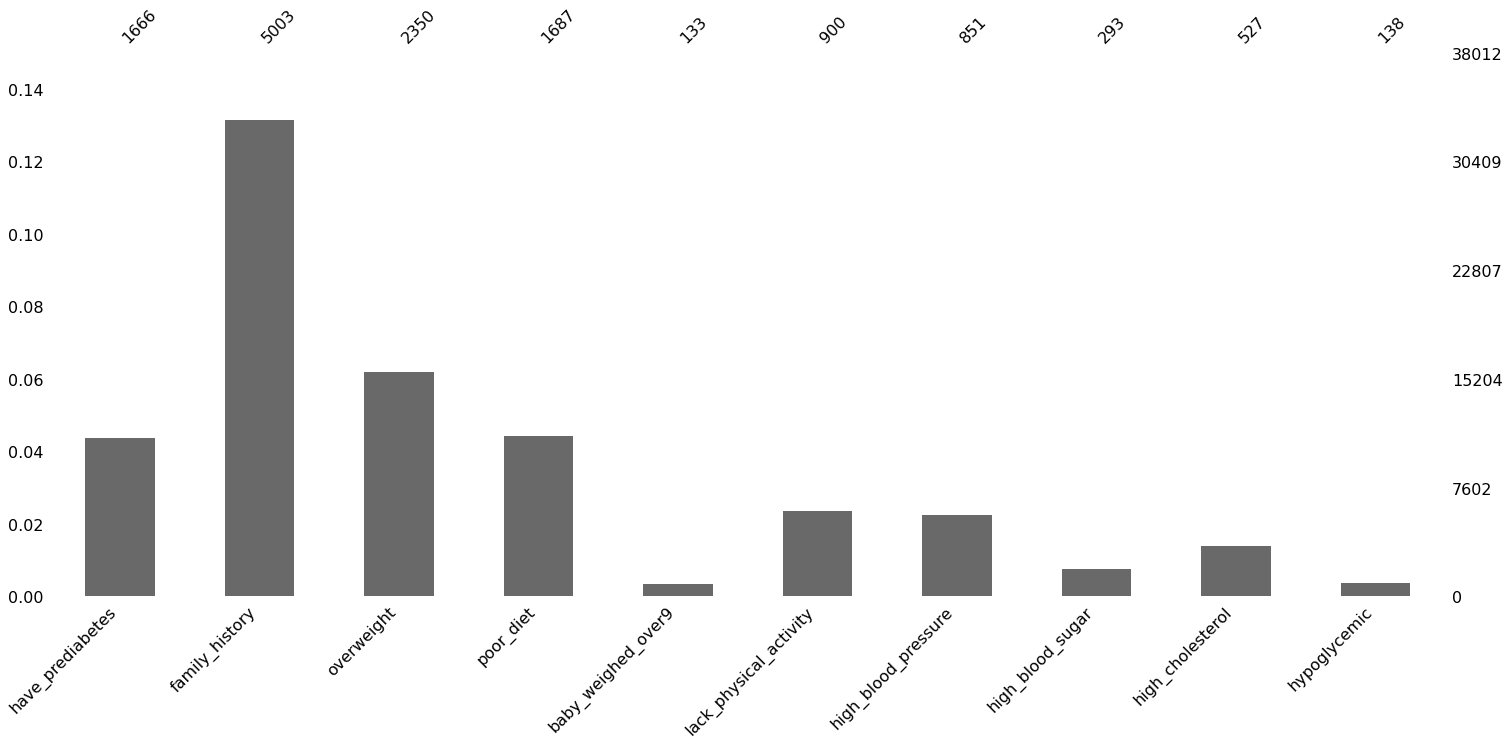

In [72]:
diabetes_data_copy[feature_lst] = diabetes_data_copy[feature_lst].replace(0,np.nan) # replace 0 by using NA
diabetes_data_copy['have_prediabetes'] = diabetes_data_copy['have_prediabetes'].replace(2,np.nan)
p=msno.bar(diabetes_data_copy[feature_lst])
plt.ylim((0, 0.15))
plt.show()

#### The higher the bar, the more 'yes' answer for the question

In [68]:
diabetes_data_copy = df.copy()
# split 0 and 1 rows
diabetes_data_copy_1 = diabetes_data_copy[diabetes_data_copy['have_risk']==1]
diabetes_data_copy_0 = diabetes_data_copy[diabetes_data_copy['have_risk']==0]

C:\Users\DELL\AppData\Local\Temp\ipykernel_19836\2006542662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_data_copy_1[feature_lst] = diabetes_data_copy_1[feature_lst].replace(0,np.nan) # replace 0 by using NA
C:\Users\DELL\AppData\Local\Temp\ipykernel_19836\2006542662.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_data_copy_1['have_prediabetes'] = diabetes_data_copy_1['have_prediabetes'].replace(2,np.nan)


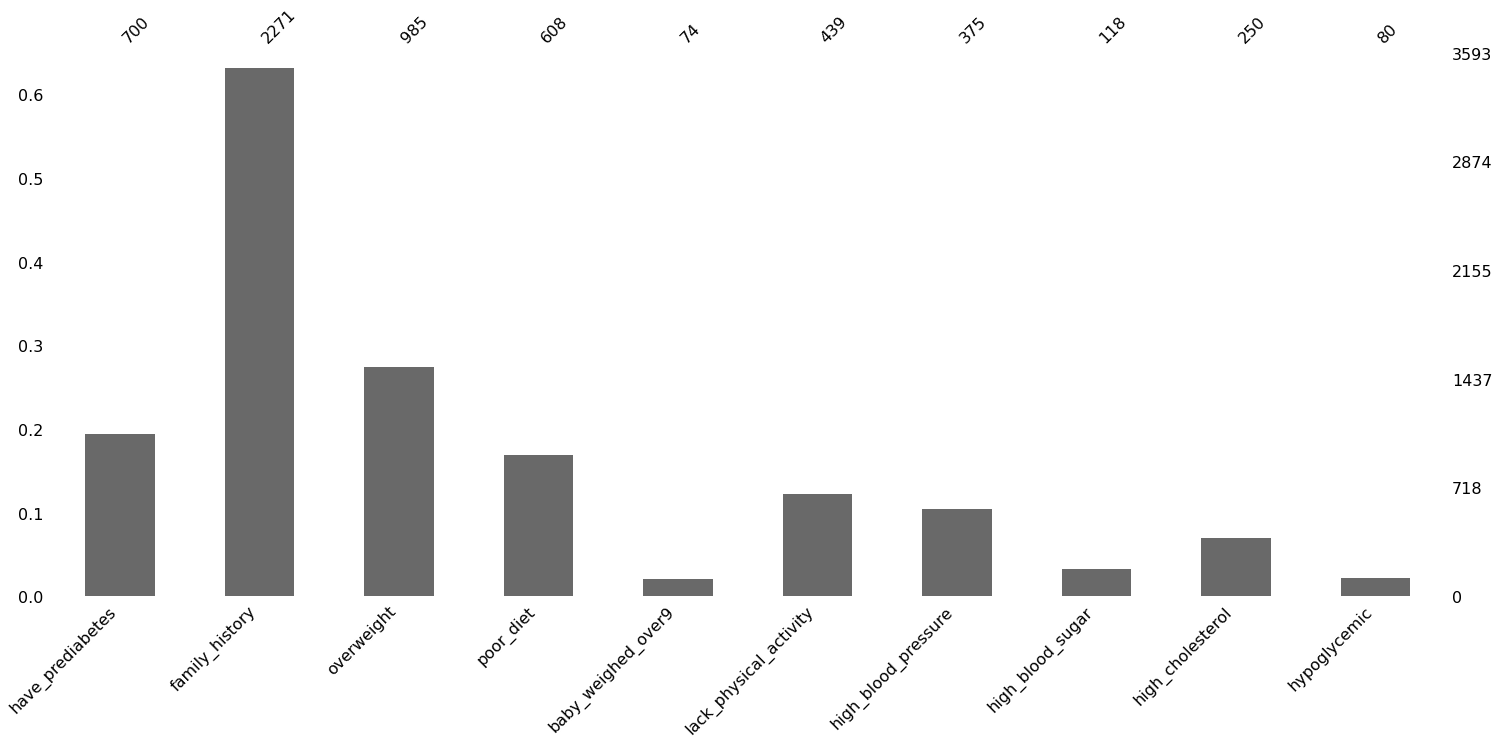

In [69]:
diabetes_data_copy_1[feature_lst] = diabetes_data_copy_1[feature_lst].replace(0,np.nan) # replace 0 by using NA
diabetes_data_copy_1['have_prediabetes'] = diabetes_data_copy_1['have_prediabetes'].replace(2,np.nan)
p=msno.bar(diabetes_data_copy_1[feature_lst])
plt.ylim((0, 0.65))
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_19836\4110432199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_data_copy_0[feature_lst] = diabetes_data_copy_0[feature_lst].replace(0,np.nan) # replace 0 by using NA
C:\Users\DELL\AppData\Local\Temp\ipykernel_19836\4110432199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_data_copy_0['have_prediabetes'] = diabetes_data_copy_0['have_prediabetes'].replace(2,np.nan)


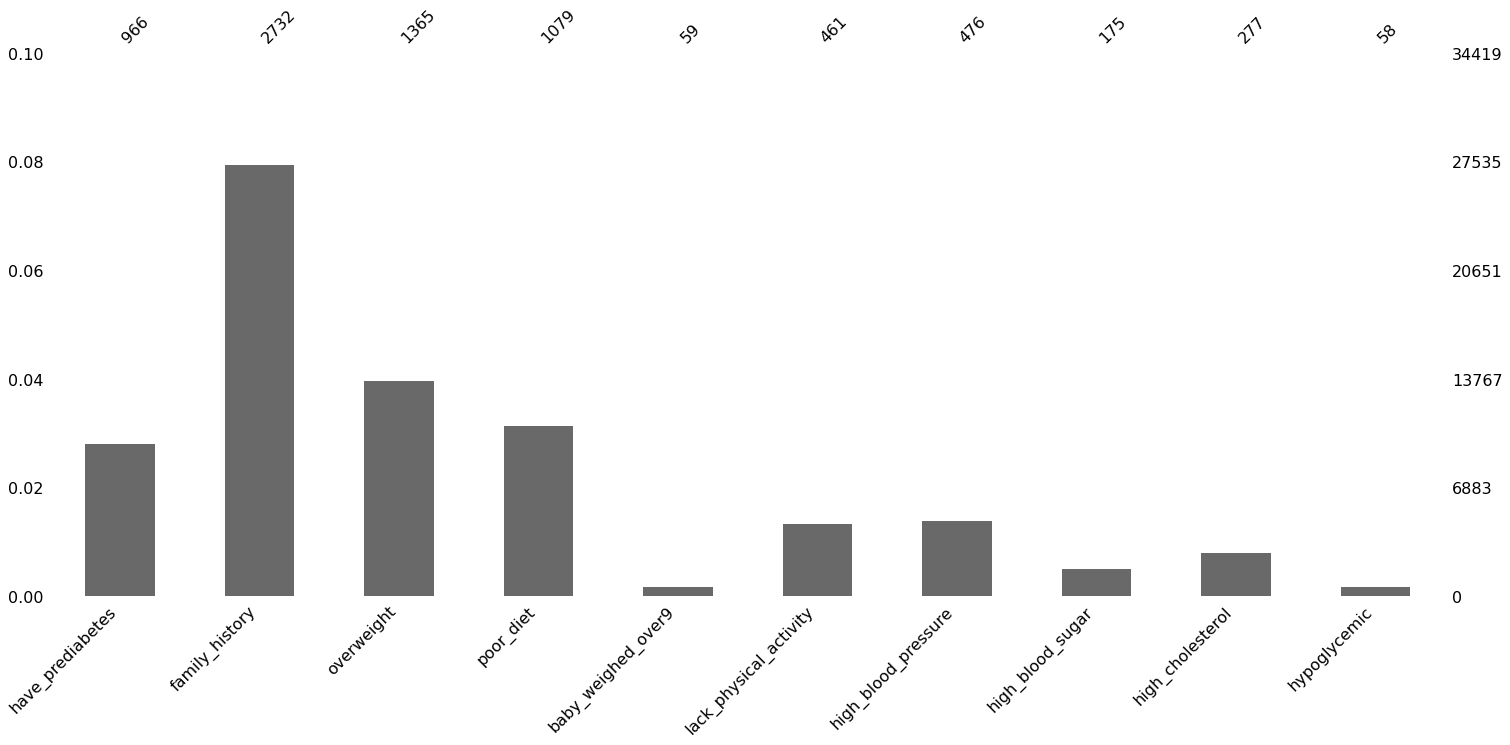

In [71]:
diabetes_data_copy_0[feature_lst] = diabetes_data_copy_0[feature_lst].replace(0,np.nan) # replace 0 by using NA
diabetes_data_copy_0['have_prediabetes'] = diabetes_data_copy_0['have_prediabetes'].replace(2,np.nan)
p=msno.bar(diabetes_data_copy_0[feature_lst])
plt.ylim((0, 0.1))
plt.show()

Seem that for people has risk of getting diabetes, much more of them have family history, compared with other features.

The distribution of choose 'Yes' for people having risk or not having risk of getting diabetes is almost the same.

### split training data and testing data 8:2

In [37]:
# Upsetting the order
df = df.sample(frac=1,random_state=1).reset_index(drop=True)
# split data
train, test = train_test_split(df, test_size=0.2)

In [38]:
train['have_risk'].value_counts()

0    27543
1     2866
Name: have_risk, dtype: int64

### Balancing the amount of target feature for 0 and 1

1. * Reduce the amount of 0: take a random portion of the data for 0 so that the amount of 0 and 1 is 1:1.

2. * Increasing the amount of data: using bootstraping, from all the training data, multiple put-back sampling to increase the data set by a factor of 10, then randomly select portion of the data for 0 to make the amount of 0 and 1 to be 1:1.

1. Reduce the amount of 0：

In [39]:
# split 0 and 1 rows
train_1 = train[train['have_risk']==1]
train_0 = train[train['have_risk']==0]

In [40]:
train_1['have_risk'].value_counts()

1    2866
Name: have_risk, dtype: int64

In [41]:
# rebalanced df for 'Top-up Month'=1
reba_train_0 = train_0.sample(frac=0.106,random_state=1)

In [42]:
reba_train_0['have_risk'].value_counts()

0    2920
Name: have_risk, dtype: int64

In [43]:
# union the rebalanced training data
reba_train = pd.concat([train_1,reba_train_0])

In [44]:
reba_train['have_risk'].value_counts()

0    2920
1    2866
Name: have_risk, dtype: int64

2. Increasing the amount of data

In [116]:
train_rep = train.sample(frac=10,random_state=9,replace=True)

In [117]:
train_rep['have_risk'].value_counts()

0    275283
1     28807
Name: have_risk, dtype: int64

In [118]:
# split 0 and 1 rows
train_1_rep = train_rep[train['have_risk']==1]
train_0_rep = train_rep[train['have_risk']==0]

C:\Users\DELL\AppData\Local\Temp\ipykernel_19836\3799270431.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_1_rep = train_rep[train['have_risk']==1]
C:\Users\DELL\AppData\Local\Temp\ipykernel_19836\3799270431.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_0_rep = train_rep[train['have_risk']==0]


In [120]:
# rebalanced df for 'Top-up Month'=1
reba_train_0_rep = train_0_rep.sample(frac=0.1,random_state=83)

In [121]:
reba_train_0_rep['have_risk'].value_counts()

0    27528
Name: have_risk, dtype: int64

In [122]:
# union the rebalanced training data
reba_train_rep = pd.concat([train_1_rep,reba_train_0_rep])

In [123]:
reba_train_rep['have_risk'].value_counts()

1    28807
0    27528
Name: have_risk, dtype: int64

In [124]:
reba_train_copy = reba_train_rep.copy()

In [125]:
train_1_rep = reba_train_copy[train['have_risk']==1]
train_0_rep = reba_train_copy[train['have_risk']==0]

C:\Users\DELL\AppData\Local\Temp\ipykernel_19836\3021818340.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_1_rep = reba_train_copy[train['have_risk']==1]
C:\Users\DELL\AppData\Local\Temp\ipykernel_19836\3021818340.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_0_rep = reba_train_copy[train['have_risk']==0]


In [126]:
train_1_copy = train_1_rep.copy()

In [127]:
train_0_copy = train_0_rep.copy()

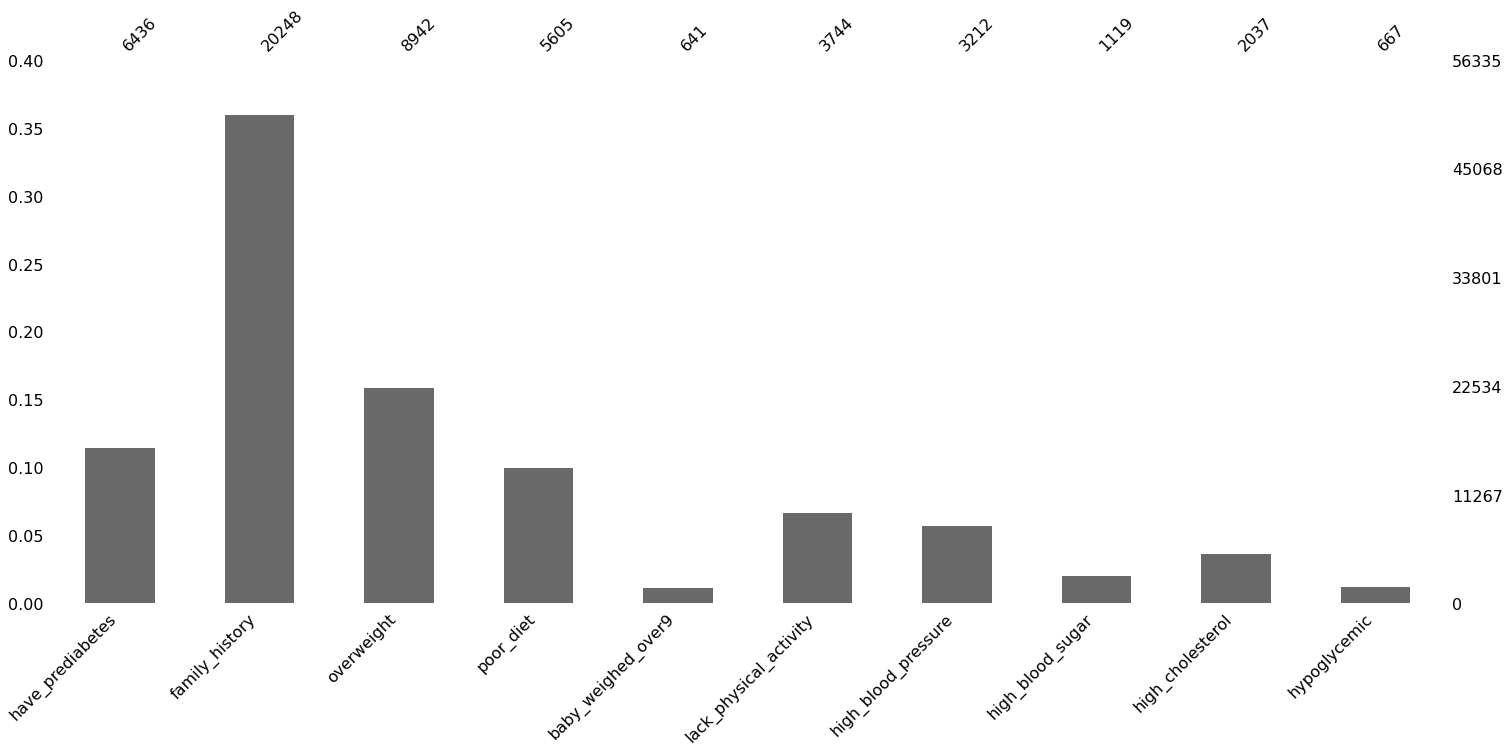

In [128]:
reba_train_copy[feature_lst] = reba_train_copy[feature_lst].replace(0,np.nan)
reba_train_copy['have_prediabetes'] = reba_train_copy['have_prediabetes'].replace(2,np.nan)
p=msno.bar(reba_train_copy[feature_lst])
plt.ylim((0, 0.4))
plt.show()

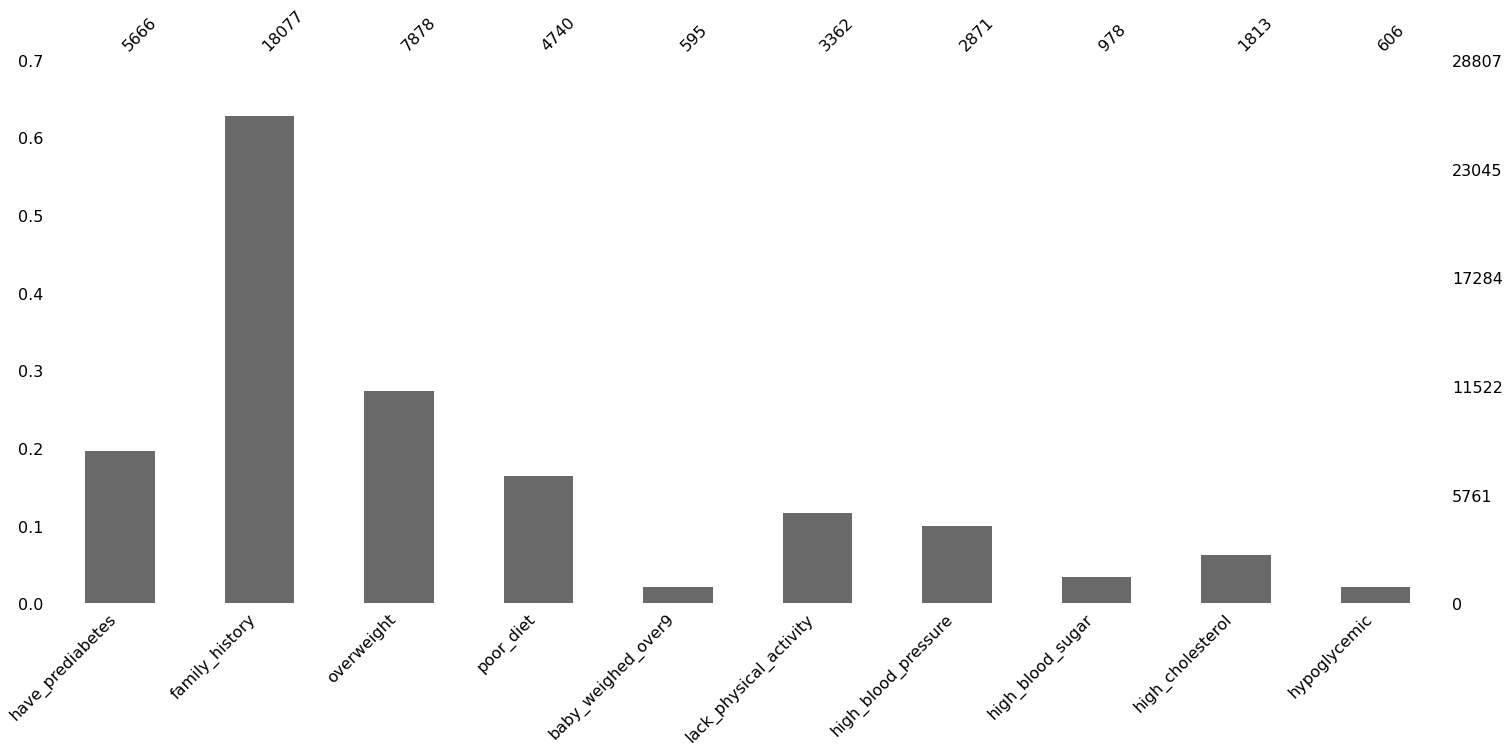

In [129]:
train_1_copy[feature_lst] = train_1_copy[feature_lst].replace(0,np.nan)
train_1_copy['have_prediabetes'] = train_1_copy['have_prediabetes'].replace(2,np.nan)
p=msno.bar(train_1_copy[feature_lst])
plt.ylim((0, 0.7))
plt.show()

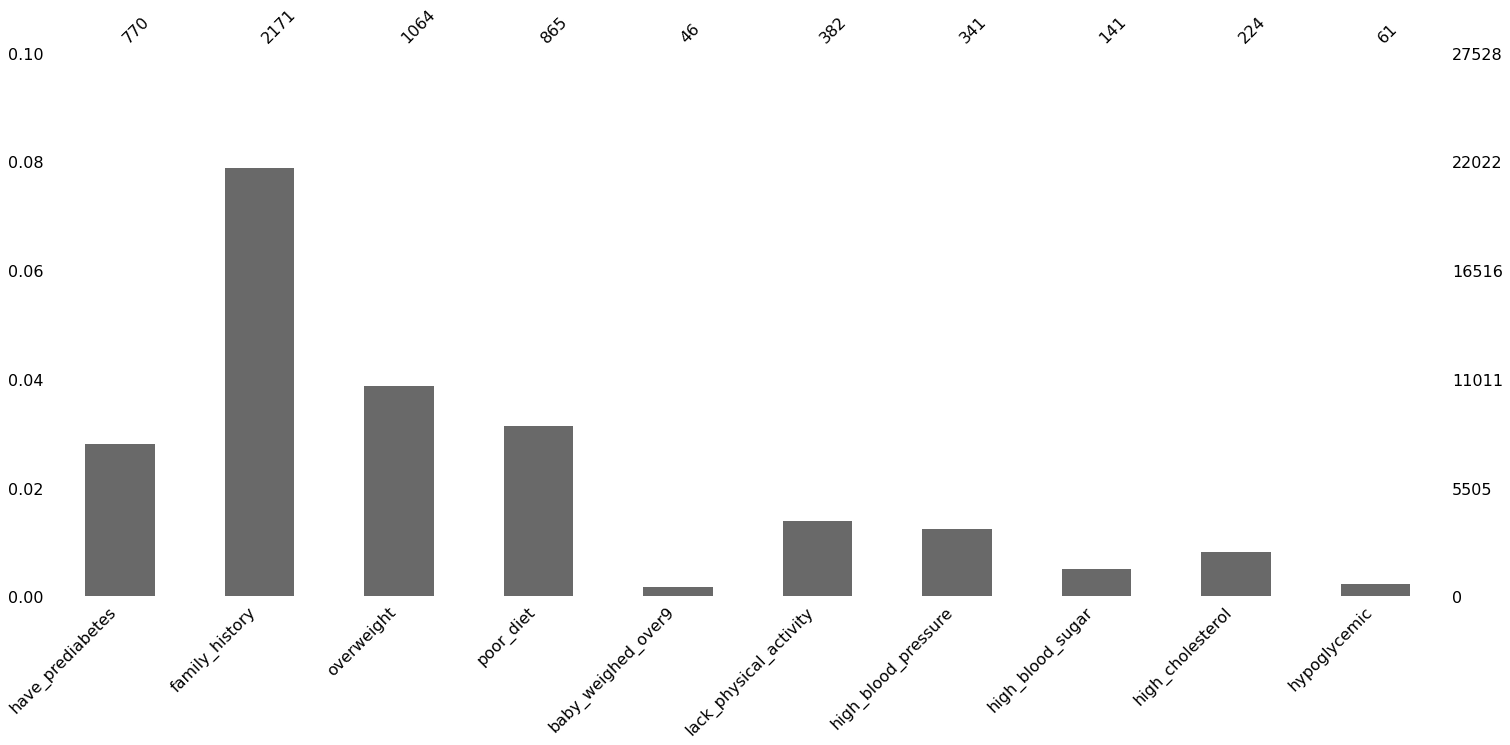

In [130]:
train_0_copy[feature_lst] = train_0_copy[feature_lst].replace(0,np.nan)
train_0_copy['have_prediabetes'] = train_0_copy['have_prediabetes'].replace(2,np.nan)
p=msno.bar(train_0_copy[feature_lst])
plt.ylim((0, 0.1))
plt.show()

# Logistic Regression

In [131]:
x_train = reba_train_rep[feature_lst]

y_train = reba_train_rep['have_risk']

x_test = test[feature_lst]

In [132]:
X = x_train.copy()
y = y_train.copy()

# split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
model = logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 77.07


In [133]:
y_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [134]:
# confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[4980,  601],
       [1983, 3703]], dtype=int64)

In [135]:
# Evaluation by using cross validation
scores = cross_val_score(model, X, y, cv=5)
scores

array([0.78299459, 0.77278779, 0.7721665 , 0.77376409, 0.7776693 ])

In [136]:
# Prediction
model.predict(X) # should use test data

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### feature selection

Feature: 0, Score: -0.63706
Feature: 1, Score: 2.54746
Feature: 2, Score: 0.84752
Feature: 3, Score: 0.00855
Feature: 4, Score: 0.78641
Feature: 5, Score: 0.40026
Feature: 6, Score: 0.57719
Feature: 7, Score: 1.41835
Feature: 8, Score: 0.46429
Feature: 9, Score: 0.86994


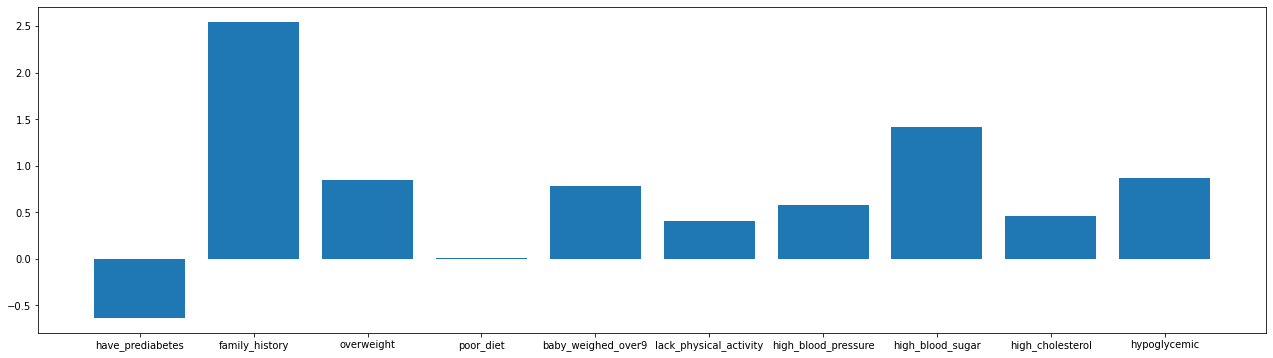

In [137]:
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(22, 6))
plt.bar(feature_lst, importance)
plt.show()

In [138]:
# evaluation of a model using 5 features chosen with random forest importance
# from sklearn.feature_selection import SelectFromModel
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectFromModel(estimator=LogisticRegression(),max_features=6)
    # learn relationship from training data
    model_fit = fs.fit(X_train, y_train)
    # feature index
    feature_idx = model_fit.get_support()
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs, feature_idx

# split X and y into training and testing sets
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
# feature selection
X_train_fs, X_test_fs, fs, feature_idx = select_features(X_train, y_train, X_test)
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
model_fs = logreg.fit(X_train_fs,y_train)

# evaluate the model
y_pred_fs=logreg.predict(X_test_fs)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred_fs)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 77.00


In [139]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_fs)
cnf_matrix

array([[5082,  499],
       [2092, 3594]], dtype=int64)

In [140]:
# Evaluation
scores = cross_val_score(model_fs, X, y, cv=5)
scores

array([0.78299459, 0.77278779, 0.7721665 , 0.77376409, 0.7776693 ])

In [141]:
feature_idx

array([False,  True, False, False, False, False, False,  True, False,
        True])

only keep feature: `'family_history'`,`'baby_weighed_over9'`,`'high_blood_sugar'`,`'hypoglycemic'`

# Decision Tree

In [175]:
x_train = reba_train_rep[feature_lst]

y_train = reba_train_rep['have_risk']

x_test = test[feature_lst]

In [176]:
X = x_train.copy()
y = y_train.copy()

# split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

dt = DecisionTreeClassifier(criterion='gini',max_depth=7,class_weight=None)

# fit the model with data
model = dt.fit(X_train,y_train)

#
y_pred=dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))

print('AUC: %.2F' % (metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 79.04
AUC: 0.79


In [177]:
# Evaluation
scores = cross_val_score(model, X, y, cv=5)
scores

array([0.80012426, 0.79133753, 0.79124878, 0.79266886, 0.79826041])

In [178]:
import sklearn.metrics as matrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.88      0.81      5581
           1       0.86      0.70      0.77      5686

    accuracy                           0.79     11267
   macro avg       0.80      0.79      0.79     11267
weighted avg       0.80      0.79      0.79     11267



### feature selection

In [179]:
sorted(list(zip(X.columns,dt.feature_importances_)),key=lambda x:x[1],reverse=True)

[('family_history', 0.7549316142442135),
 ('have_prediabetes', 0.19718699968905487),
 ('high_blood_pressure', 0.01391249777807001),
 ('overweight', 0.013357159343811953),
 ('poor_diet', 0.008784687198046759),
 ('high_blood_sugar', 0.003992958997090438),
 ('lack_physical_activity', 0.0025396314321497054),
 ('high_cholesterol', 0.0019855946672627245),
 ('hypoglycemic', 0.0018521417616434604),
 ('baby_weighed_over9', 0.0014567148886564353)]

select the above 6 features

In [170]:
feature_lst_final = ['have_prediabetes', 'family_history', 'overweight', 'poor_diet', 'lack_physical_activity', 'high_blood_sugar']

In [190]:
x_train = reba_train[feature_lst_final]

y_train = reba_train['have_risk']

x_test = test[feature_lst_final]

In [191]:
X = x_train.copy()
y = y_train.copy()

# split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=9)

dt = DecisionTreeClassifier(criterion='gini',max_depth=5,class_weight=None, random_state=123)

# fit the model with data
model = dt.fit(X_train,y_train)

#
y_pred=dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))

print('AUC: %.2F' % (metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 80.14
AUC: 0.80


In [182]:
# Evaluation
scores = cross_val_score(model, X, y, cv=5)
scores

array([0.79015544, 0.79083838, 0.77441659, 0.8167675 , 0.79429559])

In [183]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       590
           1       0.87      0.70      0.78       568

    accuracy                           0.80      1158
   macro avg       0.81      0.80      0.80      1158
weighted avg       0.81      0.80      0.80      1158



In [185]:
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

* the probability of predicting 0 and 1:

In [186]:
content=dt.predict_proba(X_test)
content #[0,1]

array([[0.64882578, 0.35117422],
       [0.64882578, 0.35117422],
       [0.06153846, 0.93846154],
       ...,
       [0.64882578, 0.35117422],
       [0.95982143, 0.04017857],
       [0.64882578, 0.35117422]])

### Tuning of model parameters

In [189]:
param = {'criterion':['gini'],'max_depth':[x for x in range(5,15,1)]}
grid = GridSearchCV(DecisionTreeClassifier(),param_grid=param,cv=5)
grid.fit(X_train,y_train)
print('Optimal classifier:',grid.best_params_,'Optimal score:', grid.best_score_)  # 得到最优的参数和分值


Optimal classifier: {'criterion': 'gini', 'max_depth': 5} Optimal score: 0.7923486077870527


## save model

In [140]:
import pickle

In [141]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

# SVM

In [192]:
x_train = reba_train_rep[feature_lst]

y_train = reba_train_rep['have_risk']

x_test = test[feature_lst]

In [193]:
X = x_train.copy()
y = y_train.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

svclassifier = SVC(kernel='linear')
model = svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))

print('AUC: %.2F' % (metrics.roc_auc_score(y_test, y_pred)))


Accuracy: 77.12
AUC: 0.77


In [194]:
# Evaluation
scores = cross_val_score(model, X, y, cv=5)
scores

array([0.7786456 , 0.76985888, 0.77083518, 0.7721665 , 0.77456288])

In [195]:
# Prediction
model.predict(X) # should use test data

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [196]:
# Evaluating the Algorithm
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5074  498]
 [2080 3615]]
              precision    recall  f1-score   support

           0       0.71      0.91      0.80      5572
           1       0.88      0.63      0.74      5695

    accuracy                           0.77     11267
   macro avg       0.79      0.77      0.77     11267
weighted avg       0.80      0.77      0.77     11267



# Model Selection

Our ultimate aim is to predict the probability of a user having diabetes, that is, the probability that the target feature == 1. 

This requires us to use a scorecard type model. 

Judged from this perspective, logistic regression and decision trees are more applicable and have better interpretability. 

However, not all algorithms that can predict probabilities are suitable for scoring card-like models, such as SVM models, which can predict probabilities, but this algorithm's strength is in classification and is not very good at predicting probabilities. And after our modelling we can see that the SVM model is not very accurate, so it is not used.

In contrast to the logistic regression and decision tree models, the decision tree has a higher accuracy and AUC.

When selecting the features we can also see that logistic regression only filtered out 4 features and one of them is `baby_weighed_over9` which had a low probability of occurring for our target users. I don't want to add this question on our questionnaire. 

Above all, we ended up using a decision tree model.